# Lab 09 - Character-level Language Model with LSTM

In this lab, your task is to build a character-level language model with LSTM layer.

Reference: [Let's build GPT: from scratch, in code, spelled out (by Andrej Karpathy)](https://www.youtube.com/watch?v=kCc8FmEb1nY)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd "/content/drive/MyDrive/UCCD3074_Labs/UCCD3074_Lab9"

In [ ]:
import os, time
import torch
import torch.nn as nn
from torch.nn import functional as F

In [ ]:
torch.manual_seed(1234)
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [ ]:
if not os.path.exists('input.txt'):
    !wget 'https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt'

---
# Load the dataset

Read the dataset into the string `raw_data`.

In [ ]:
with open('./input.txt', 'r', encoding='utf-8') as f:
    raw_data = f.read()

# print the length of the datasets
# ...

# look at the first 1000 characters
# ...

---
# Create the vocabulary

Get the the vocabulary `vocab` from the raw data. `vocab` contains all unique characters in the raw data. 

In [ ]:
# vocab = ...
# vocab_size = ...
print('vocab:', vocab)
print('vocab_size:', vocab_size)

Create the vocabulary mapping functions. `stoi` performs the mapping from the character token to its index, and `itos`, vice versa.

In [ ]:
# stoi = ...
# itos = ...

Create the function to encode and decode the text. `encode_text` encodes a string into its one-hot integer representation while `decode_text` decodes an integer representation back to its text.

In [ ]:
# encode_text = ...
# ... encode the text 'Hello how do you do?'
print(encoded)

In [ ]:
# decode_text = lambda l : ''.join([itos[i] for i in l])
# ... decode the encoded text above
print(decoded)

Now, we encode the raw data and then convert it into a 1-D integer tensor `data`. 

In [ ]:
# data = ... encode raw data and convert to tensor
print('Shape of data:', data.shape)
print('Type of data: ', data.dtype)
print('\nFirst 100 characters of data:\n', data[:100])

To train the language model, the samples will be trained with a block of text with `block_size` characters. The function `get_batch` randomly sample a block of text as input `x`. The label `y` is the block of text shifted by 1 position of `x`.

In [ ]:
torch.manual_seed(1234)
def get_batch(batch_size, block_size, device):
    # ix   = ... randomly sample a valid starting position 
    # x    = ... get sampled input
    # y    = ... get sampled target value
    # x, y = ... transfer to targeted device
    return x, y

In [ ]:
batch_size=4
block_size=8

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
x_batch, y_batch = get_batch(batch_size, block_size, device)

print(x_batch)
print('----------------')
print(y_batch)

Note that when training on `(x, y)`, the model is learning multiple conditional probabilities `p(target|context)` simultaneously.

In [ ]:
x, y = x_batch[0], y_batch[0]

print('x:', x.tolist())
print('y:', y.tolist(), '\n')

for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f'when input is: {context}, the target is: {target}')

# Create the character-level language model with LSTM

#### Network structure

Now, let's build the character-level language model with LSTM. The network `LMNet` has the following layers:

|Layer| Configuration | Shape |
|---|---|---|
| Input | - | `(B, T)`|
|Embedding | num_embedding = vocab_size, <br> embedding_dim = n_embd | `(B, T, n_embd)`|
|LSTM | input_size = n_embd, <br> hidden_size = n_embd  <br> num_layers = 1, <br> batch_first = true| `(B, T, n_embd)` |
| fc | in_features = n_embd, <br> out_features = vocab_size | `(B, T, vocab_size)` |


#### Generating novel text

To generate novel text, we implement the method `generate`. Since the network is trained on a sequence of length `T` = `block_size`, when generating the text, we feed the most recent `block_size` characters into the network to generate the next character. Here are the steps:

1. Crop the most recent `block_size` characters in the generated text
2. The cropped text is fed to the generative model to generate the next character. The network output the `logit` value.
3. Convert the logit of the network to `probit` value by performing `softmax` operation.
4. Sample a character from the `probit` by using [`torch.multinorm`](https://pytorch.org/docs/stable/generated/torch.multinomial.html)
5. Append the sampled character to the end of the generated text.
6. Repeat steps 1-5 for `text_len` times



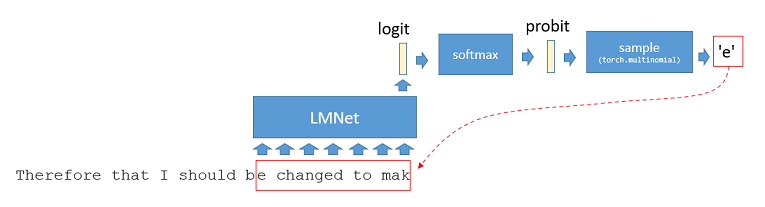

In [ ]:
class LMNet(nn.Module):
    def __init__(self, vocab_size, n_embd):
        super().__init__()
        # ... your code here ...
    
    def forward(self, x):             
        # ... your code here ...        
        return x

    def generate(self, text_len, block_size):

        model.eval()  # set to evaluation mode

        # initialize the text with the first token (newline)
        num_samples = 1
        num_tokens = 1
        text = torch.zeros((num_samples, num_tokens), dtype=torch.long).to(device)  
        
        # repeat until the length of text = "text_len"
        # ...

            # crop text to the last block-size tokens
            # ...

            # get the predictions
            # ...
            
            # focus only on the last time step
            # ...

            # apply soft max to get probabilities
            # ...

            # sample from distribution
            # ...

            # append sampled index to the running sequence
            # ...

            # print the sample
            # print(itos[next_token.item()], end='')
            # time.sleep(0.1)            

Create the model for testing

In [ ]:
model = LMNet(vocab_size=len(vocab), n_embd=32).to(device)

In [ ]:
x, y = get_batch(batch_size=4, block_size=8)
x, y = x.to(device), y.to(device)

yhat = model(x)

--------------------
# Train the model

In [ ]:
batch_size    = 128
block_size    = 256
lr            = 3e-4
max_iters     = 10000
show_interval = 500
n_embd        = 256

Create the model

In [ ]:
model = LMNet(vocab_size=len(vocab), n_embd=n_embd).to(device)

Create the optimizer

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

Train the model

To train the model, we use **teacher forcing** where the predicted output is simply the 1-shifted sequence of the input sequence. We shall train the network with sentence sequence of length `block_size`. Since the network is trained on sequences of length `block_size`, during inference, the generative model should use input sequence of similar length to get good results.

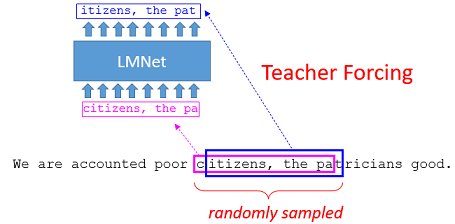

During training, the network is based on the many-to-many architecture. However, during inference (Figure at generating novel text), the network is based on many-to-one architecture.

In [ ]:
model.train()  # set to training mode

for steps in range(max_iters):

    # sample a batch of data
    # x, y = ... get batch data ...
        
    # forward propagation
    # yhat = perform inference 

    # compute loss
    B, T, C = yhat_batch.shape
    # yhat = ... reshape from (B, T, C) --> (B*T, C)
    # y = ... reshape from (B, T) --> (B*T,)
    # loss = ... compute cross entropy loss...

    # backpropagation
    # ... perform backprop
    # ... update parameter

    # reset the optimizer
    # ... reset optimizer

    # print the training loss
    if steps % show_interval == 0:
        print(f"Iter {steps}: train loss {loss:.4f}")

Generate text

In [ ]:
model.generate(text_len=1000, block_size=block_size)